# Arctic Permafrost Modeling

ATS initially came out of a desire to model Arctic permafrost using the best available understanding of cryosphere processes, including subsurface flow in partially saturated, partially frozen soils.  These simulations form the basis for doing this work, and represent an approach designed for continuous permafrost.

This demo also is useful for seeing how layering works in ATS, as there are heterogeneous properties throughout (peat and mineral soil layers).

The basic spinup of this sequence is as follows:

* spinup0-water_table: Run a steady-state problem to establish a water table
* spinup1-freezeup: Freeze the steady-state water table from below, establishing a saturated ice table.
* spinup2-dynamic: Drive a simulation with an annual, cyclic steady-state meterological data, derived from DayMet but smoothed extensively to generate a climatologically "typical" year.  This establishes a permafrost vs active layer, reasonable saturation state, etc.

After these, many choices are available.  1D column runs could be run using the same input file as spinup2-dynamic and driven with real daily data.  2D or 3D runs on transects, hillslopes, or other geometries can have the result of spinup2-dynamic draped from the surface and lateral flow and spatial variations can be considered.  All of these use the same basic form of input file, with a differing mesh, so we simply demonstrate one, including snow distribution to capture variations in snowpack with topography.

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
import h5py
import pandas as pd

In [3]:
sns.set()

In [4]:
file_name = 'permafrost_column.demo'
input_filename = 'permafrost_column.xml'

In [5]:
import warnings
warnings.filterwarnings("ignore")

### RK - work

### Input data - 

In [6]:
with h5py.File(f'data/spinup-10yr.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,3650)
    data_input = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        data_input[f'{i}'] = np.array(hdf.get(f'{i}'))
        
data_input['time [days]'] = data_input['time [s]']/86400        
data_input.index = data_input['time [days]']

data_input['Air temperature [°C]'] = data_input['air temperature [K]'] - 273.15
data_input.head()

,air temperature [K],incoming shortwave radiation [W m^-2],precipitation rain [m s^-1],precipitation snow [m SWE s^-1],relative humidity [-],time [s],wind speed [m s^-1],time [days],Air temperature [°C]
time [days],,,,,,,,,
0.0,250.274842,-0.072606,0.0,5.937940e-09,0.835239,0.0,5.809783,0.0,-22.875158
1.0,250.162168,-0.080807,0.0,5.937940e-09,0.834729,86400.0,5.814823,1.0,-22.987832
2.0,250.041937,-0.092183,0.0,5.937940e-09,0.834057,172800.0,5.828910,2.0,-23.108063
3.0,249.890313,-0.103809,0.0,5.937940e-09,0.833188,259200.0,5.855721,3.0,-23.259687
4.0,249.748460,-0.119944,0.0,5.937940e-09,0.832292,345600.0,5.874984,4.0,-23.401540


In [7]:
data_input_1yr = data_input[0:365]

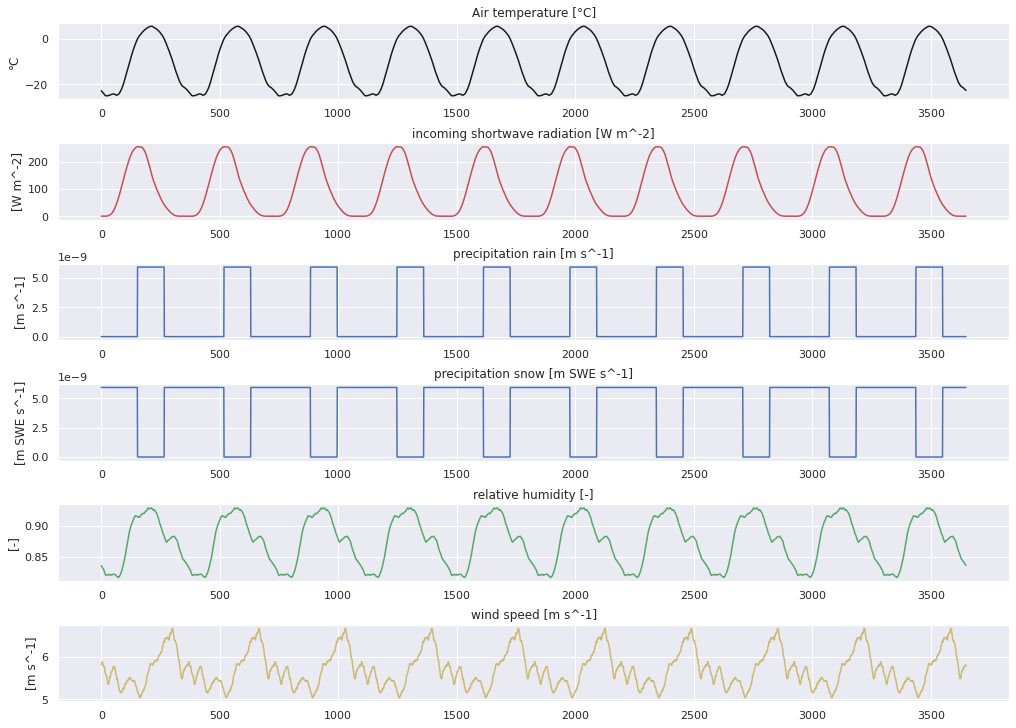

In [8]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Air temperature [°C]')
f2_ax1.plot(data_input['Air temperature [°C]'],'k', label='Air temperature [°C]')
f2_ax1.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('incoming shortwave radiation [W m^-2]')
f2_ax2.plot(data_input['incoming shortwave radiation [W m^-2]'],'r', label='incoming shortwave radiation [W m^-2]')
f2_ax2.set_ylabel('[W m^-2]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input['precipitation rain [m s^-1]'],'b', label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax3.grid(True)

f2_ax4.set_title('precipitation snow [m SWE s^-1]')
f2_ax4.plot(data_input['precipitation snow [m SWE s^-1]'],'b', label='precipitation snow [m SWE s^-1]')
f2_ax4.set_ylabel('[m SWE s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax4.grid(True)

f2_ax5.set_title('relative humidity [-]')
f2_ax5.plot(data_input['relative humidity [-]'],'g', label='relative humidity [-]')
f2_ax5.set_ylabel('[-]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax5.grid(True)

f2_ax6.set_title('wind speed [m s^-1]')
f2_ax6.plot(data_input['wind speed [m s^-1]'],'y', label='wind speed [m s^-1]')
f2_ax6.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax6.grid(True)

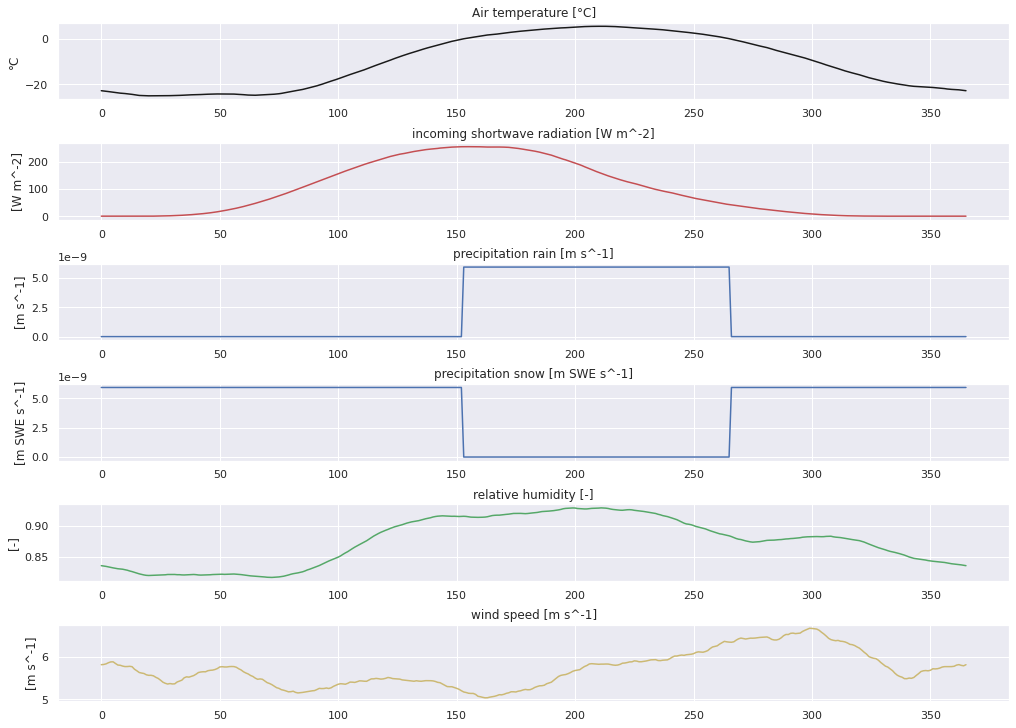

In [9]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Air temperature [°C]')
f2_ax1.plot(data_input_1yr['Air temperature [°C]'],'k', label='Air temperature [°C]')
f2_ax1.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('incoming shortwave radiation [W m^-2]')
f2_ax2.plot(data_input_1yr['incoming shortwave radiation [W m^-2]'],'r', label='incoming shortwave radiation [W m^-2]')
f2_ax2.set_ylabel('[W m^-2]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input_1yr['precipitation rain [m s^-1]'],'b', label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax3.grid(True)

f2_ax4.set_title('precipitation snow [m SWE s^-1]')
f2_ax4.plot(data_input_1yr['precipitation snow [m SWE s^-1]'],'b', label='precipitation snow [m SWE s^-1]')
f2_ax4.set_ylabel('[m SWE s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax4.grid(True)

f2_ax5.set_title('relative humidity [-]')
f2_ax5.plot(data_input_1yr['relative humidity [-]'],'g', label='relative humidity [-]')
f2_ax5.set_ylabel('[-]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax5.grid(True)

f2_ax6.set_title('wind speed [m s^-1]')
f2_ax6.plot(data_input_1yr['wind speed [m s^-1]'],'y', label='wind speed [m s^-1]')
f2_ax6.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax6.grid(True)

#### Comments:
* It rains from the time period of [153:265], The rest of the time period it snows 

In [10]:
data_input_1yr[153:268]

,air temperature [K],incoming shortwave radiation [W m^-2],precipitation rain [m s^-1],precipitation snow [m SWE s^-1],relative humidity [-],time [s],wind speed [m s^-1],time [days],Air temperature [°C]
time [days],,,,,,,,,
153.0,273.197168,256.659446,5.937940e-09,0.000000e+00,0.915681,13219200.0,5.172024,153.0,0.047168
154.0,273.378035,256.729340,5.937940e-09,0.000000e+00,0.915442,13305600.0,5.160073,154.0,0.228035
155.0,273.536288,256.698519,5.937940e-09,0.000000e+00,0.914906,13392000.0,5.143226,155.0,0.386288
156.0,273.712250,256.657222,5.937940e-09,0.000000e+00,0.914299,13478400.0,5.138413,156.0,0.562250
157.0,273.879508,256.737173,5.937940e-09,0.000000e+00,0.914127,13564800.0,5.138907,157.0,0.729508
...,...,...,...,...,...,...,...,...,...
264.0,273.455499,44.111838,5.937940e-09,0.000000e+00,0.884734,22809600.0,6.344061,264.0,0.305499
265.0,273.243122,42.886690,5.937940e-09,0.000000e+00,0.883874,22896000.0,6.337220,265.0,0.093122
266.0,273.013846,41.661729,0.000000e+00,5.937940e-09,0.882604,22982400.0,6.333779,266.0,-0.136154


### Extracting the node information of the cells

In [11]:
# Extracted the the coordinates from paraview - have to think of a smarter way!

data_nodes = pd.read_csv('data/column_coord.csv')
data_nodes
# Points_2 - represents the dz 

,Points_0,Points_1,Points_2,Points_Magnitude,Point ID
0,0,0,5.00,5.0000,0
1,0,0,4.98,4.9800,1
2,0,0,4.96,4.9600,2
3,0,0,4.94,4.9400,3
4,0,0,4.92,4.9200,4
...,...,...,...,...,...
339,1,1,-27.00,27.0370,339
340,1,1,-29.00,29.0345,340
341,1,1,-31.00,31.0322,341
342,1,1,-33.00,33.0303,342


In [12]:
### Finding the average between two rows - to find centroidal distance

#z_1 = data_nodes['Points_2'][1:]
data_nodes['Points_2_a'] = data_nodes['Points_2'].shift(1,axis=0)
#z_1.append({'0':0},ignore_index=True)
data_nodes['Points_2_a'][0] = 0
data_nodes['dz'] = (data_nodes['Points_2'] + data_nodes['Points_2_a'])/2
data_nodes

,Points_0,Points_1,Points_2,Points_Magnitude,Point ID,Points_2_a,dz
0,0,0,5.00,5.0000,0,0.00,2.50
1,0,0,4.98,4.9800,1,5.00,4.99
2,0,0,4.96,4.9600,2,4.98,4.97
3,0,0,4.94,4.9400,3,4.96,4.95
4,0,0,4.92,4.9200,4,4.94,4.93
...,...,...,...,...,...,...,...
339,1,1,-27.00,27.0370,339,-25.00,-26.00
340,1,1,-29.00,29.0345,340,-27.00,-28.00
341,1,1,-31.00,31.0322,341,-29.00,-30.00
342,1,1,-33.00,33.0303,342,-31.00,-32.00


In [13]:
# Storing the dz coordinate
dz = data_nodes['Points_2'][:86]
dz

0      5.00
1      4.98
2      4.96
3      4.94
4      4.92
      ...  
81   -27.00
82   -29.00
83   -31.00
84   -33.00
85   -35.00
Name: Points_2, Length: 86, dtype: float64

### Output data:

#### The data files are stored in three seperate files:
1. Subsurface data - ats_vis_data.h5
2. Surface data - ats_vis_surface_data.h5
3. Snow data - ats_vis_snow_data.h5

In [14]:
file_name = 'permafrost_column.demo'
input_filename = 'permafrost_column.xml'

### Defining a dataframe that extracts the data for a single variable for all time instances

### 1. Subsurface data - ats_vis_data.h5

In [15]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    #base_porosity_all = np.array(hdf.get(f'molar_density_ice.cell.0/{0}'))
    #base_porosity = base_porosity_all.flatten()
    #print(base_porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'capillary_pressure_liq_ice.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'density_rock.cell.0', 'dwater_content|dtemperature.cell.0', 'energy.cell.0', 'enthalpy.cell.0', 'internal_energy_ice.cell.0', 'internal_energy_liquid.cell.0', 'internal_energy_rock.cell.0', 'mass_density_liquid.cell.0', 'molar_density_ice.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_ice.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'thermal_conductivity.cell.0', 'total_energy_source.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0', 'water_source.cell.0']




In [16]:
def input_datavar(file_name, variable):
    """
    The function defined to extract a variable across all time instances.
    
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    variable: Name of the variable in the dataset that you are interested in.
    Ex: 'cell_volume'
    
    Output parameters:
    
    data_var : pandas dataframe with the time series data of the variable.
    
    """
    
    # Storing the dz coordinates
    ### Finding the average between two rows - to find centroidal distance

    #z_1 = data_nodes['Points_2'][1:]
    data_nodes['Points_2_a'] = data_nodes['Points_2'].shift(1,axis=0)
    #z_1.append({'0':0},ignore_index=True)
    data_nodes['Points_2_a'][0] = 0
    data_nodes['dz'] = (data_nodes['Points_2'] + data_nodes['Points_2_a'])/2
        
    z = data_nodes['dz'][1:86]
    
    # To determine the time period and the list in which the dataframes 
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        var_all_0 = np.array(hdf.get(f'{variable}.cell.0/0'))
        var_0 = var_all_0.flatten()
        data_var = pd.DataFrame(index=z,data=var_0,columns=[f'0'])
        
        for i in time_period[1:]:
            var_all = np.array(hdf.get(f'{variable}.cell.0/{i}'))
            var = var_all.flatten()
            
            data_var[f'{i}'] = var
    
    return data_var

In [17]:
### Accessing the variable at all time instances

### Add or remove variable name if required
variables = ['saturation_liquid','saturation_ice','saturation_gas','pressure','relative_permeability','temperature','permeability','porosity','thermal_conductivity','water_content']
for i in variables:
    locals()["df_"+str(i)] = input_datavar(file_name, i)
    len_rows = len(locals()["df_"+str(i)].columns)
    locals()["df_"+str(i)].columns = np.arange(0,len_rows,1)

In [18]:
df_pressure.head()

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
dz,,,,,,,,,,,,,,,,,,,,,
4.99,-23275.828212,-24209.872520,-25259.305592,-26450.167126,-27700.539418,-28941.531450,-30169.181643,-31367.996543,-32518.785989,-33624.336798,...,-2.114233e+06,-2.118836e+06,-2.123087e+06,-2.126941e+06,-2.130263e+06,-2.133254e+06,-2.136594e+06,-2.140619e+06,-2.144956e+06,-2.149049e+06
4.97,-21156.715048,-22012.605859,-22996.144744,-24125.058631,-25318.686066,-26510.386734,-27693.292484,-28851.874633,-29967.323319,-31041.022275,...,6.170352e+04,6.166098e+04,6.162123e+04,6.158504e+04,6.155360e+04,6.152526e+04,6.149409e+04,6.145700e+04,6.141702e+04,6.137904e+04
4.95,-17573.929189,-18345.477449,-19253.672812,-20307.493794,-21429.592277,-22556.558789,-23679.129680,-24781.952147,-25846.857736,-26873.958652,...,4.474323e+04,4.467888e+04,4.461822e+04,4.456279e+04,4.451433e+04,4.447058e+04,4.442298e+04,4.436682e+04,4.430626e+04,4.424841e+04
4.93,-12643.071050,-13327.221693,-14153.317116,-15121.883015,-16160.538129,-17209.945840,-18259.019554,-19292.799213,-20293.995332,-21261.621209,...,1.912907e+04,1.902982e+04,1.893551e+04,1.884896e+04,1.877285e+04,1.870400e+04,1.862987e+04,1.854314e+04,1.844962e+04,1.835981e+04
4.91,-6278.889542,-6873.950780,-7611.996307,-8486.014759,-9429.983777,-10389.454278,-11352.145709,-12303.740684,-13228.077232,-14123.275728,...,-1.471379e+04,-1.486180e+04,-1.500352e+04,-1.513410e+04,-1.524963e+04,-1.535435e+04,-1.546602e+04,-1.559554e+04,-1.573515e+04,-1.586989e+04


In [19]:
pressure_head_data = df_pressure/(10000)

In [20]:
pressure_head_data

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
dz,,,,,,,,,,,,,,,,,,,,,
4.99,-2.327583,-2.420987,-2.525931,-2.645017,-2.770054,-2.894153,-3.016918,-3.136800,-3.251879,-3.362434,...,-211.423265,-211.883606,-212.308710,-212.694107,-213.026339,-213.325378,-213.659449,-214.061910,-214.495614,-214.904851
4.97,-2.115672,-2.201261,-2.299614,-2.412506,-2.531869,-2.651039,-2.769329,-2.885187,-2.996732,-3.104102,...,6.170352,6.166098,6.162123,6.158504,6.155360,6.152526,6.149409,6.145700,6.141702,6.137904
4.95,-1.757393,-1.834548,-1.925367,-2.030749,-2.142959,-2.255656,-2.367913,-2.478195,-2.584686,-2.687396,...,4.474323,4.467888,4.461822,4.456279,4.451433,4.447058,4.442298,4.436682,4.430626,4.424841
4.93,-1.264307,-1.332722,-1.415332,-1.512188,-1.616054,-1.720995,-1.825902,-1.929280,-2.029400,-2.126162,...,1.912907,1.902982,1.893551,1.884896,1.877285,1.870400,1.862987,1.854314,1.844962,1.835981
4.91,-0.627889,-0.687395,-0.761200,-0.848601,-0.942998,-1.038945,-1.135215,-1.230374,-1.322808,-1.412328,...,-1.471379,-1.486180,-1.500352,-1.513410,-1.524963,-1.535435,-1.546602,-1.559554,-1.573515,-1.586989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-26.00,107.596711,107.596711,107.596711,107.596711,107.596711,107.596711,107.596711,107.596711,107.596711,107.596711,...,107.596927,107.596931,107.596936,107.596940,107.596945,107.596950,107.596954,107.596959,107.596964,107.596969
-28.00,114.266708,114.266708,114.266708,114.266708,114.266708,114.266708,114.266708,114.266708,114.266708,114.266708,...,114.266793,114.266795,114.266797,114.266799,114.266801,114.266803,114.266805,114.266807,114.266809,114.266811
-30.00,123.102348,123.102348,123.102348,123.102349,123.102349,123.102349,123.102349,123.102349,123.102349,123.102349,...,123.102390,123.102391,123.102392,123.102392,123.102393,123.102394,123.102395,123.102395,123.102396,123.102397


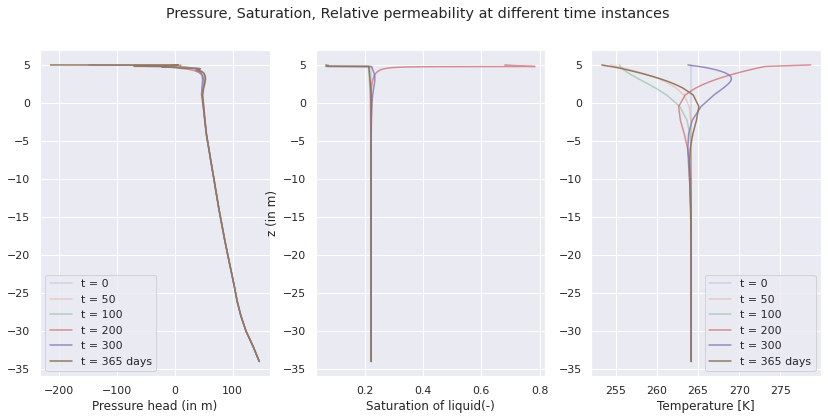

In [21]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Relative permeability at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[0], z, alpha=0.2)
ax1.plot(df_saturation_liquid[50], z, alpha=0.3)
ax1.plot(df_saturation_liquid[100], z, alpha=0.5)
ax1.plot(df_saturation_liquid[200], z, alpha=0.6)
ax1.plot(df_saturation_liquid[300], z, alpha=0.8)
ax1.plot(df_saturation_liquid[365], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(pressure_head_data[0], z, alpha=0.2, label ='t = 0')
ax2.plot(pressure_head_data[50], z, alpha=0.3, label ='t = 50')
ax2.plot(pressure_head_data[100], z, alpha=0.4, label ='t = 100')
ax2.plot(pressure_head_data[200], z, alpha=0.6, label ='t = 200')
ax2.plot(pressure_head_data[300], z, alpha=0.8, label ='t = 300')
ax2.plot(pressure_head_data[365], z, alpha=1, label ='t = 365 days')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
#ax2.set_ylim(4,6)
ax2.legend()

ax3.plot(df_temperature[0], z, alpha=0.2, label ='t = 0')
ax3.plot(df_temperature[50], z, alpha=0.3, label ='t = 50')
ax3.plot(df_temperature[100], z, alpha=0.4, label ='t = 100')
ax3.plot(df_temperature[200], z, alpha=0.6, label ='t = 200')
ax3.plot(df_temperature[300], z, alpha=0.8, label ='t = 300')
ax3.plot(df_temperature[365], z, alpha=1, label ='t = 365 days')
#ax3.plot(df_temperature[200], z, alpha=1)
ax3.set_xlabel('Temperature [K]')
#ax3.set_ylim(4,6)
ax3.legend()

### Plotting during snow

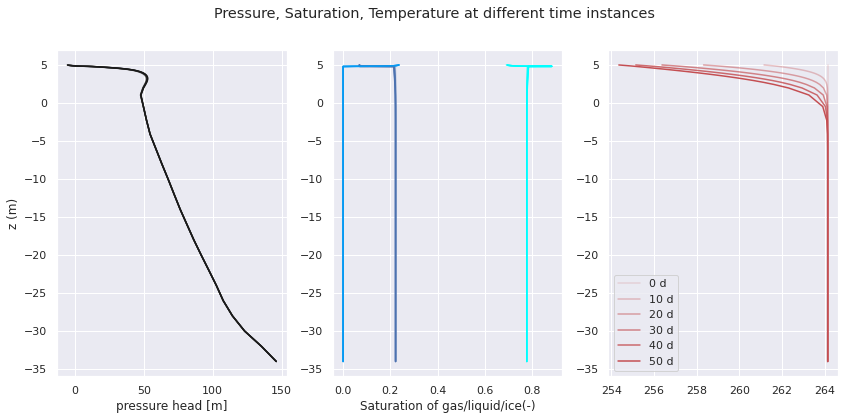

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

time_instance = [0, 10, 20, 30, 40, 50]
t_len = len(time_instance)
color_intensity = 1/t_len
alpha_c = color_intensity

for i in time_instance:
    # Plotting pressure
    ax1.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    ax1.set_xlabel('pressure head [m]')
    ax1.set_ylabel('z (m)')
    
    
    
    # Plotting saturation - 
    ax2.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    ax2.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    ax2.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    ax2.set_xlabel('Saturation of gas/liquid/ice(-)')
#ax1.legend()
    #print(color_intensity)
    
    ax3.plot(df_temperature[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    ax3.legend()
    
    alpha_c = alpha_c + color_intensity


### Plotting Pressure head, Saturation and temperature for the first 50 days - 

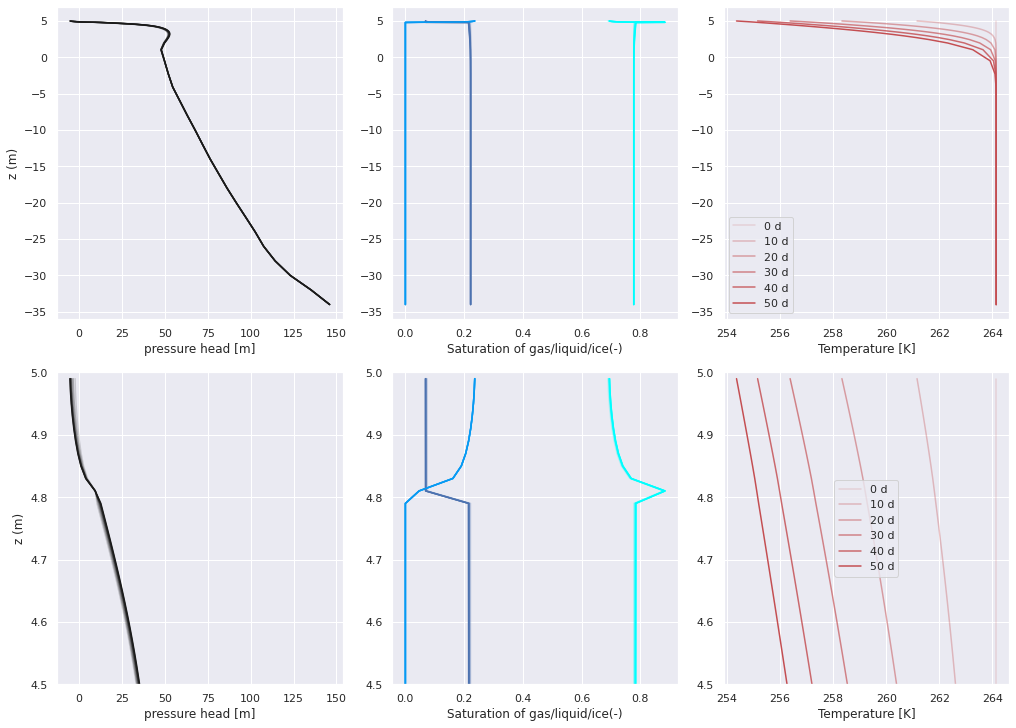

In [23]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

z = df_saturation_liquid.index



time_instance = [0, 10, 20, 30, 40, 50]
t_len = len(time_instance)
color_intensity = 1/t_len
alpha_c = color_intensity

for i in time_instance:
    # Plotting pressure
    f2_ax1.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    f2_ax1.set_xlabel('pressure head [m]')
    f2_ax1.set_ylabel('z (m)')
    
    
    
    # Plotting saturation - 
    f2_ax2.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    f2_ax2.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    f2_ax2.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    f2_ax2.set_xlabel('Saturation of gas/liquid/ice(-)')
#ax1.legend()
    #print(color_intensity)
    
    f2_ax3.plot(df_temperature[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    f2_ax3.set_xlabel('Temperature [K]')
    f2_ax3.legend()
    

    
    f2_ax4.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    f2_ax4.set_xlabel('pressure head [m]')
    f2_ax4.set_ylabel('z (m)')
    f2_ax4.set_ylim(4.5,5)
    
    
    
    # Plotting saturation - 
    f2_ax5.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    f2_ax5.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    f2_ax5.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    f2_ax5.set_xlabel('Saturation of gas/liquid/ice(-)')
    f2_ax5.set_ylim(4.5,5)

    
    f2_ax6.plot(df_temperature[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    f2_ax6.legend()
    f2_ax6.set_ylim(4.5,5)
    f2_ax6.set_xlabel('Temperature [K]')
    
    alpha_c = alpha_c + color_intensity

### Plotting Pressure head, Saturation and Temperature from 150 - 275 days :

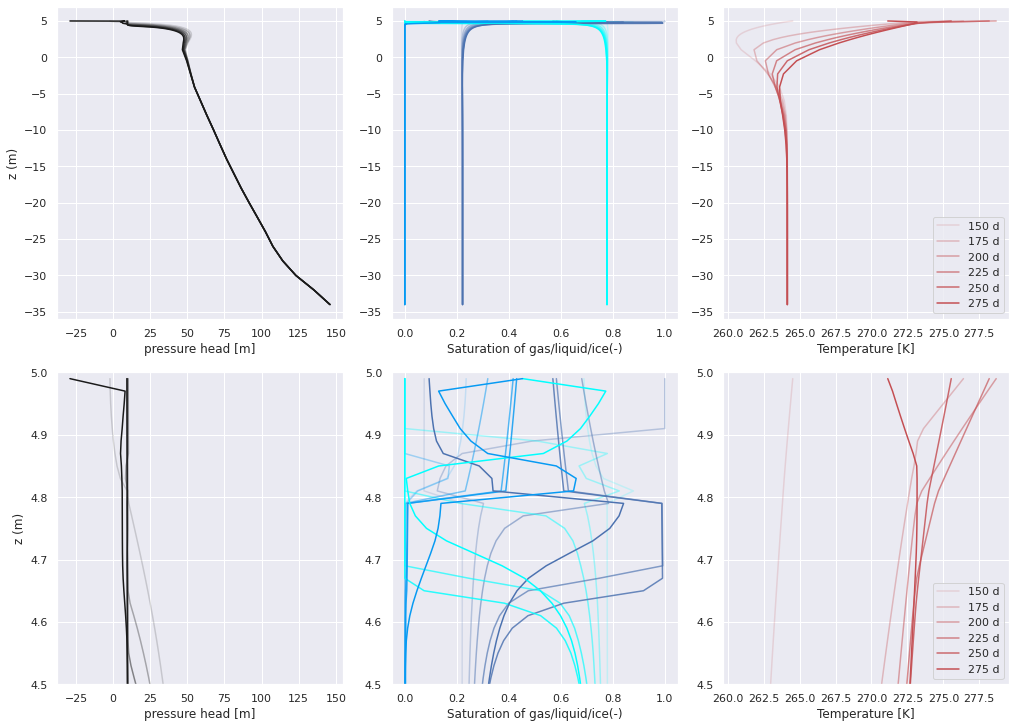

In [24]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

z = df_saturation_liquid.index



time_instance = [150, 175, 200, 225, 250, 275]
t_len = len(time_instance)
color_intensity = 1/t_len
alpha_c = color_intensity

for i in time_instance:
    # Plotting pressure
    f2_ax1.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    f2_ax1.set_xlabel('pressure head [m]')
    f2_ax1.set_ylabel('z (m)')
    
    
    
    # Plotting saturation - 
    f2_ax2.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    f2_ax2.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    f2_ax2.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    f2_ax2.set_xlabel('Saturation of gas/liquid/ice(-)')
#ax1.legend()
    #print(color_intensity)
    
    f2_ax3.plot(df_temperature[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    f2_ax3.set_xlabel('Temperature [K]')
    f2_ax3.legend()
    

    
    f2_ax4.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    f2_ax4.set_xlabel('pressure head [m]')
    f2_ax4.set_ylabel('z (m)')
    f2_ax4.set_ylim(4.5,5)
    
    
    
    # Plotting saturation - 
    f2_ax5.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    f2_ax5.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    f2_ax5.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    f2_ax5.set_xlabel('Saturation of gas/liquid/ice(-)')
    f2_ax5.set_ylim(4.5,5)

    
    f2_ax6.plot(df_temperature[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    f2_ax6.legend()
    f2_ax6.set_ylim(4.5,5)
    f2_ax6.set_xlabel('Temperature [K]')
    
    alpha_c = alpha_c + color_intensity

### Plotting saturation, porosity, and thermal conductivity

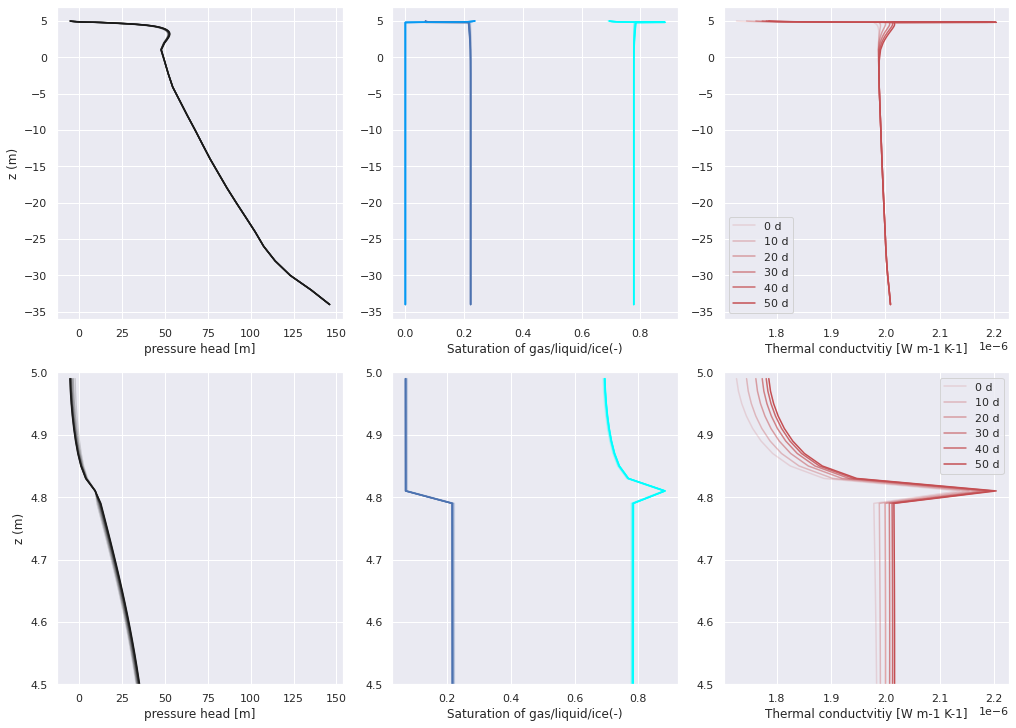

In [25]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

z = df_saturation_liquid.index



time_instance = [0, 10, 20, 30, 40, 50]
t_len = len(time_instance)
color_intensity = 1/t_len
alpha_c = color_intensity

for i in time_instance:
    # Plotting pressure
    f2_ax1.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    f2_ax1.set_xlabel('pressure head [m]')
    f2_ax1.set_ylabel('z (m)')
    
    
    # Plotting saturation - 
    f2_ax2.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    f2_ax2.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    f2_ax2.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    f2_ax2.set_xlabel('Saturation of gas/liquid/ice(-)')
#ax1.legend()
    #print(color_intensity)
    
    f2_ax3.plot(df_thermal_conductivity[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    f2_ax3.set_xlabel('Thermal conductvitiy [W m-1 K-1]')
    f2_ax3.legend()
    

    
    f2_ax4.plot(pressure_head_data[i],z,'k',alpha=alpha_c)
    f2_ax4.set_xlabel('pressure head [m]')
    f2_ax4.set_ylabel('z (m)')
    f2_ax4.set_ylim(4.5,5)
    
    
    
    # Plotting saturation - 
    f2_ax5.plot(df_saturation_liquid[i], z, 'b',alpha=alpha_c, label='liquid')
    f2_ax5.plot(df_saturation_ice[i], z, '#00FFFF',alpha=alpha_c, label='ice')
    #f2_ax5.plot(df_saturation_gas[i], z, '#069AF3',alpha=alpha_c, label='gas')
    #ax1.set_ylabel('z (in m)')
    f2_ax5.set_xlabel('Saturation of gas/liquid/ice(-)')
    f2_ax5.set_ylim(4.5,5)

    
    f2_ax6.plot(df_thermal_conductivity[i], z, 'r',alpha=alpha_c, label=f'{i} d')
    f2_ax6.legend()
    f2_ax6.set_ylim(4.5,5)
    f2_ax6.set_xlabel('Thermal conductvitiy [W m-1 K-1]')
    
    alpha_c = alpha_c + color_intensity

Comments:
* Units for thermal conductivity?

In [26]:
###

### Output data:

#### The data files are stored in three seperate files:
1. Snow data - ats_vis_snow_data.h5

In [27]:
file_name = 'permafrost_column.demo'
input_filename = 'permafrost_column.xml'

### Defining a dataframe that extracts the data for a single variable for all time instances

### 1. Subsurface data - ats_vis_data.h5

In [28]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_snow_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    snow_density_all = np.array(hdf.get(f'snow-density.cell.0/{20}'))
    snow_density = snow_density_all.flatten()
    print(snow_density)

List of datasets in this file: 
 
 ['snow-age.cell.0', 'snow-cell_volume.cell.0', 'snow-death_rate.cell.0', 'snow-density.cell.0', 'snow-depth.cell.0', 'snow-precipitation.cell.0', 'snow-source.cell.0', 'snow-source_sink.cell.0', 'snow-temperature.cell.0', 'snow-water_equivalent.cell.0']


[189.56680783]


In [29]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_snow_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    snow_density_all = np.array(hdf.get(f'snow-density.cell.0/{20}'))
    snow_density = snow_density_all.flatten()
    #print(snow_density)
    
    z_snow = np.arange(0, 366)
    data_output_snow = pd.DataFrame(index=z_snow)
    
    #print(data_input)
    for var in ls:
        #rint(var)
        #ata_output_snow[f'{i}'] = np.array(hdf.get(f'{i}'))
        #rint(i)


SyntaxError: unexpected EOF while parsing (<ipython-input-29-5d427b1391bd>, line 17)

In [30]:
a = np.array([1,2])
np.insert(a,1,[1])

array([1, 1, 2])

In [31]:
# Empty dataframe to store the time instance
time = np.array([])
print(time)
i = 0
with h5py.File(f'{file_name}/ats_vis_snow_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'snow-cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        
        time = np.append(time, time[i])
        #print(i)
        i = i + 1
        #np.insert(time,0,time_period)
        #print(time_period)
print(time.sort())

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [32]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_snow_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    snow_density_all = np.array(hdf.get(f'snow-density.cell.0/{20}'))
    snow_density = snow_density_all.flatten()
    #time_period = snow_density_all.astype('int64')
    #print(snow_density)
    
    z_snow = time_period
    data_output_snow = pd.DataFrame(index=z_snow, columns=ls)
    
    #print(data_output_snow)
    # Defining an empty array - to store the data
    #data_array = np.array([])
    
    
    #print(data_input)
    for var in ls:
        #print(var)
        for time in z_snow:
            #print(var,time)
            #print(time)
            #print(np.array(hdf.get(f'{var}/{time}')))
            #print(time)
            data_output_snow[f'{var}'][time] = np.array(hdf.get(f'{var}/{time}')) 

List of datasets in this file: 
 
 ['snow-age.cell.0', 'snow-cell_volume.cell.0', 'snow-death_rate.cell.0', 'snow-density.cell.0', 'snow-depth.cell.0', 'snow-precipitation.cell.0', 'snow-source.cell.0', 'snow-source_sink.cell.0', 'snow-temperature.cell.0', 'snow-water_equivalent.cell.0']




In [33]:
# The dataframe requires modification - changing the type, sorting the values, changing the indices
data_output_snow = data_output_snow.astype('float64')
data_output_snow = data_output_snow.sort_index()
data_output_snow['time (days)'] = np.arange(0, 366)

data_output_snow = data_output_snow.set_index('time (days)')
#data_output_snow.reindex(np.arange(0, 365))

<AxesSubplot:xlabel='time (days)'>

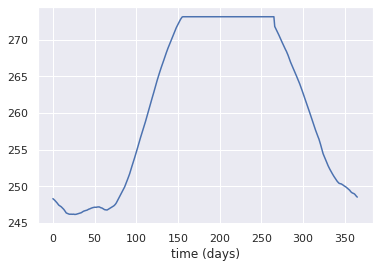

In [34]:
data_output_snow['snow-temperature.cell.0'].plot()

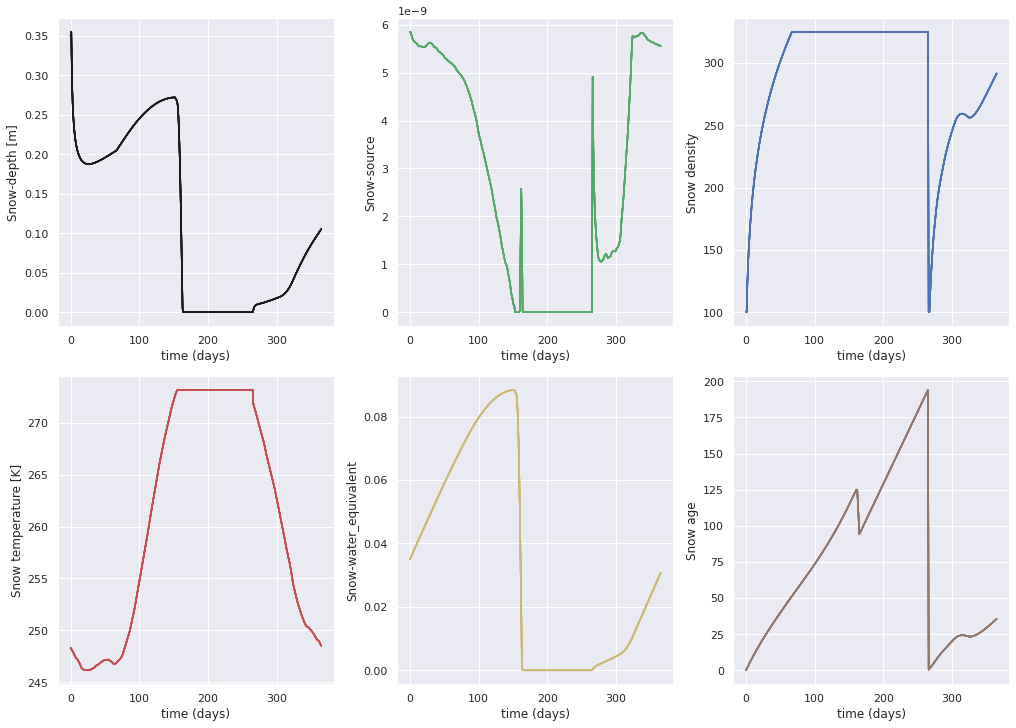

In [35]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

z = data_output_snow.index



for i in time_instance:
    # Plotting snow-depth
    f2_ax1.plot(data_output_snow['snow-depth.cell.0'],'k')
    f2_ax1.set_xlabel('time (days)')
    f2_ax1.set_ylabel('Snow-depth [m]')
    
    # Plotting snow-source
    f2_ax2.plot(data_output_snow['snow-source.cell.0'],'g')
    f2_ax2.set_xlabel('time (days)')
    f2_ax2.set_ylabel('Snow-source')
    
    # Plotting snow-density
    f2_ax3.plot(data_output_snow['snow-density.cell.0'],'b')
    f2_ax3.set_xlabel('time (days)')
    f2_ax3.set_ylabel('Snow density')
    
    # Plotting snow-temperature
    f2_ax4.plot(data_output_snow['snow-temperature.cell.0'],'r')
    f2_ax4.set_xlabel('time (days)')
    f2_ax4.set_ylabel('Snow temperature [K]')
    
    # Plotting snow-water_equivalent
    f2_ax5.plot(data_output_snow['snow-water_equivalent.cell.0'],'y')
    f2_ax5.set_xlabel('time (days)')
    f2_ax5.set_ylabel('Snow-water_equivalent')
    
    # Plotting snow-age
    f2_ax6.plot(data_output_snow['snow-age.cell.0'],'')
    f2_ax6.set_xlabel('time (days)')
    f2_ax6.set_ylabel('Snow age')


### Make note of the units!